In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl

## Implementing NMF - Non-negative Matrix Factorization directly

In [2]:
# function for Frobenius norm
def frobenius_norm(A, W, H):
    return np.linalg.norm(A - np.matmul(W, H), 'fro')

In [3]:
# function for NMF
def nmf(A, k, max_iter=1000, tol=1e-7):
    m, n = A.shape
    # W should be non-negative
    W = np.random.rand(m, k)
    H = np.random.rand(k, n)
    for i in range(max_iter):
        W = W * np.matmul(A, H.T) / np.matmul(np.matmul(W, H), H.T)
        H = H * np.matmul(W.T, A) / np.matmul(np.matmul(W.T, W), H)
        if i%500 == 0:
            print('iter:', i, ' loss:', frobenius_norm(A, W, H))
        if frobenius_norm(A, W, H) < tol:
            break
    return W, H

In [4]:
# load dataset
from sklearn.datasets import _olivetti_faces
dataset = _olivetti_faces.fetch_olivetti_faces()

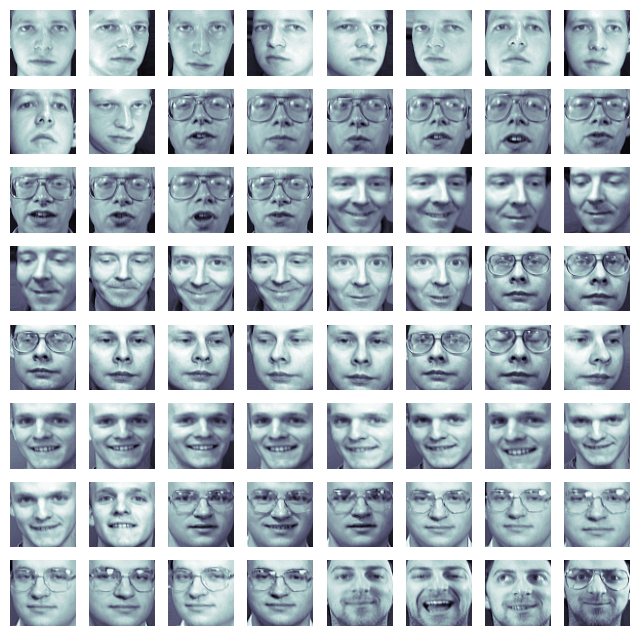

In [5]:
# show dataset
fig, ax = plt.subplots(8, 8, figsize=(8,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(dataset.data[i].reshape(64,64), cmap='bone')
    axi.axis('off')

In [6]:
# apply NMF
W, H = nmf(dataset.data.T, 144, max_iter=2500, tol=1e-7)

iter: 0  loss: 158.1489846444246
iter: 500  loss: 53.800007627312326
iter: 1000  loss: 48.7415170484226
iter: 1500  loss: 47.07406053815764
iter: 2000  loss: 46.22277867359412


In [7]:
dataset.data.shape, W.shape, H.shape

((400, 4096), (4096, 144), (144, 400))

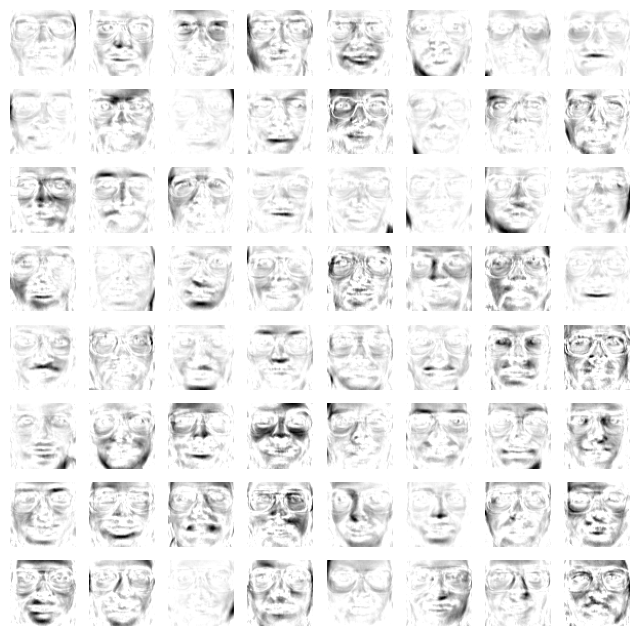

In [8]:
# show features
fig, ax = plt.subplots(8, 8, figsize=(8, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(W.T[i].reshape(64, 64), cmap='gray_r')
    axi.axis('off')

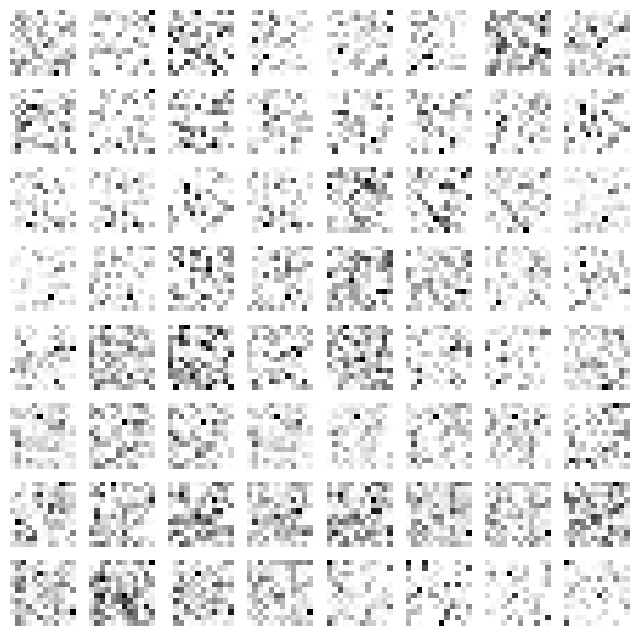

In [9]:
# show H 
fig, ax = plt.subplots(8, 8, figsize=(8,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(H.T[i].reshape(12,12), cmap='gray_r')
    axi.axis('off')

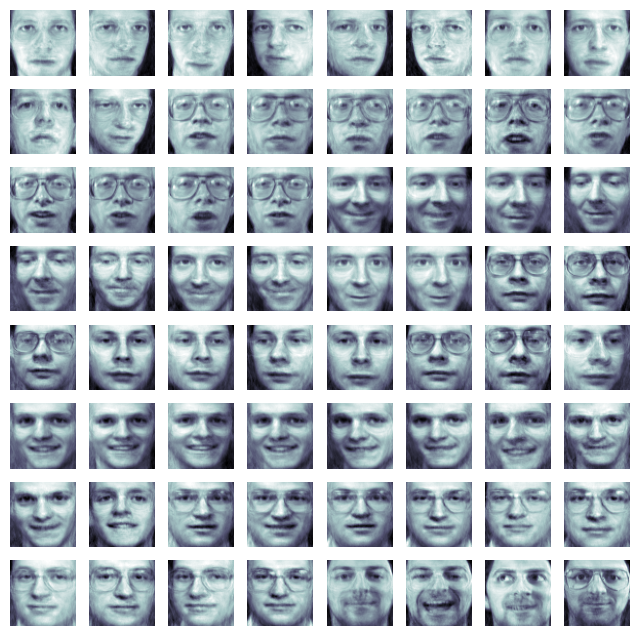

In [10]:
# show reconstruction
fig, ax = plt.subplots(8,8, figsize=(8,8))
re = W@H
for i, axi in enumerate(ax.flat):
    axi.imshow(re.T[i].reshape(64,64), cmap='bone')
    axi.axis('off')